In [2]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import nbformat
import nbimporter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Load notebooks and import corresponding functions**

In [5]:
project_dir = "/home/jupyter-tfg2425paula/prediction_project_v2"
functions_dir = os.path.join(project_dir, "arima_garch/functions")
sys.path.append(project_dir)
python_files = [f for f in os.listdir(functions_dir) if f.endswith(".py")]

for file in python_files:
    module_name = file.replace(".py", "")
    print(f"Importing module: {module_name}")
    globals()[module_name] = __import__(f"arima_garch.functions.{module_name}", fromlist=["*"])

_5_prediction_evaluate
Importing module: _5_prediction_evaluate


NameError: name 'null' is not defined

**Convert excel format to time series format and plot some results**

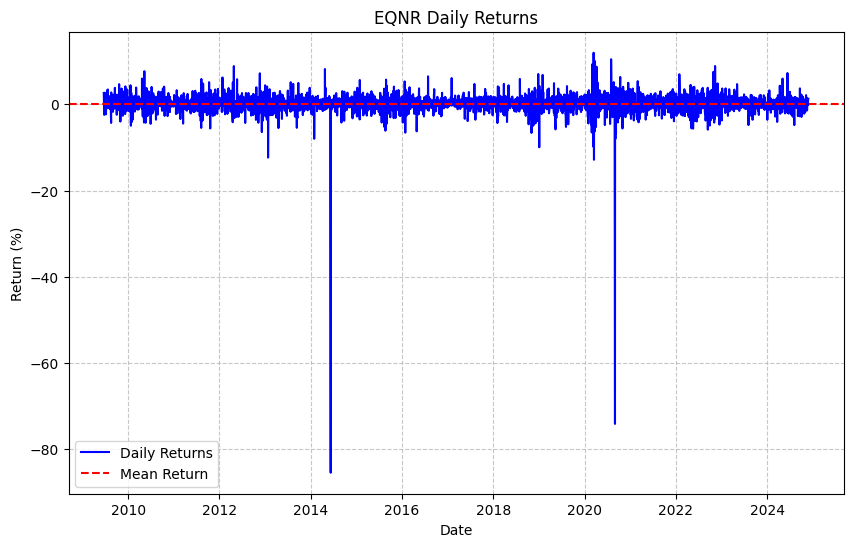

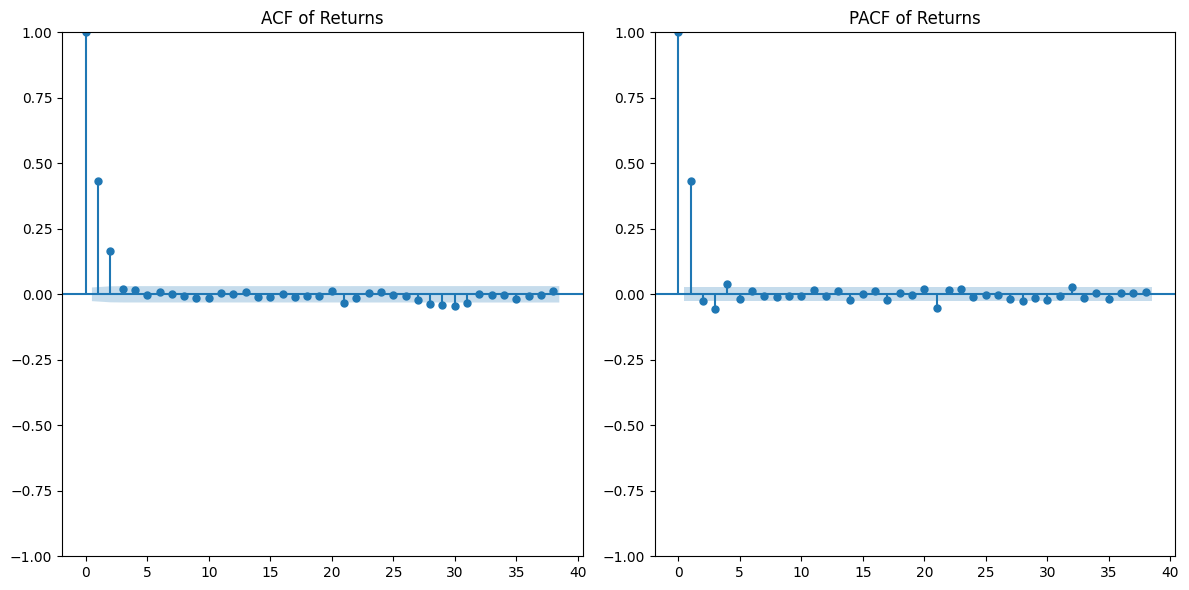

In [3]:
# 1. Load data and preprocess
stock_name = "AAPL"
file_path = os.path.join(data_dir, f"{stock_name}_Close.csv")
df = pd.read_csv(file_path, sep=";", decimal=",")
result = _1_generate_df.generate_ts(df)
ts_ret = result["ts"]
df_full_ret = result["df_full_ret"]

# Some additional plots
plt.figure(figsize=(10, 6))
plt.plot(df_full_ret["Date"], df_full_ret["Return"], color="blue", label="Daily Returns")
plt.axhline(df_full_ret["Return"].mean(), color="red", linestyle="--", label="Mean Return")
plt.title("EQNR Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_acf(ts_ret, ax=axes[0], title="ACF of Returns")
plot_pacf(ts_ret, ax=axes[1], title="PACF of Returns")
plt.tight_layout()
plt.show()

Checking if differencing is required...
Performing Augmented Dickey-Fuller (ADF) test for normal differencing...
ADF Test p-value: 0.0
The series is stationary. No normal differencing required.

Checking for monthly seasonality (30-day period)...
Monthly ADF Test p-value: 0.0
The series does not require seasonal differencing for monthly patterns.

Checking for yearly seasonality (365-day period)...
Yearly ADF Test p-value: 2.8352186528277045e-25
The series does not require seasonal differencing for yearly patterns.
Removing outliers from the column: Return...
Outlier thresholds - Lower: -3.0485814074323967, Upper: 3.352995978050678
302 outliers detected.


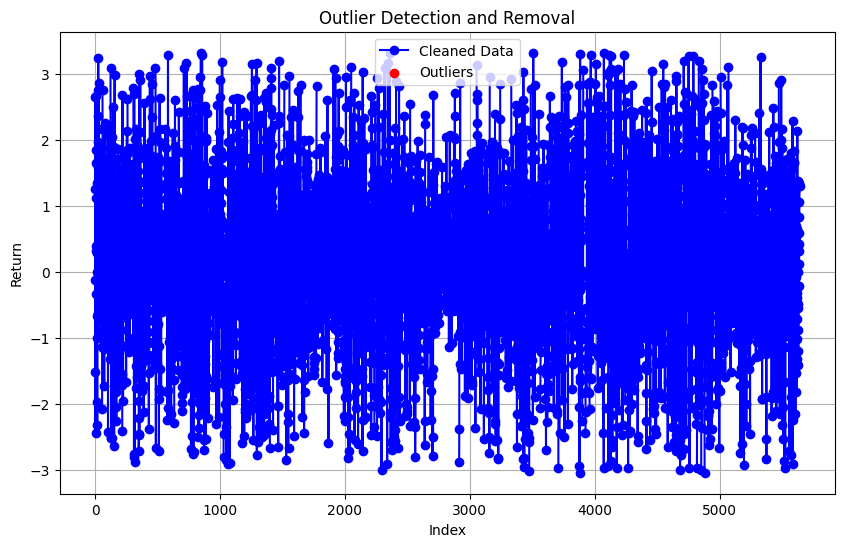

Outliers removed and replaced with interpolated values.
Training on first 5357 observations.
Testing on remaining 282 observations.


In [4]:
diff_result = _2_outliers_diff.check_differencing(df_full_ret)

d = diff_result["normal_diff_order"]
seasonal_diff_order_monthly = diff_result["seasonal_diff_order_monthly"]
seasonal_diff_order_yearly =  diff_result["seasonal_diff_order_yearly"]

df_wo_outliers = _2_outliers_diff.remove_outliers(df_full_ret)

# Intermediate step: divide between train and test
ts_ret = df_wo_outliers["Return"].values
train_size = 0.95
n = len(ts_ret)
train_index = int(train_size * n)
ts_train = ts_ret[:train_index]
ts_test = ts_ret[train_index:]
print(f"Training on first {len(ts_train)} observations.")
print(f"Testing on remaining {len(ts_test)} observations.")

In [4]:
results_dir = os.path.join(project_dir, "results/arima_garch/")
os.makedirs(results_dir, exist_ok=True)  # Create directory if it doesn't exist

# Filepath for summary DataFrame
summary_file = os.path.join(results_dir, "summary_results.csv")

# Initialize or load existing summary DataFrame
if os.path.exists(summary_file):
    summary_df = pd.read_csv(summary_file)
else:
    summary_df = pd.DataFrame(columns=[
        "Stock Name", "Train Observations", "Test Observations", 
        "Stationary", "Seasonal Stationary", 
        "ARIMA Order (p,d,q)", "GARCH Order (r,s)",
        "Residuals Independent", "Residuals Normal", 
        "Residuals Homoscedastic", "Prediction Accuracy"
    ])

1, 1
ARMA(1, 1) - Proportion p-values: 0.75 - Independence: False - AIC: 16377.32
1, 2
ARMA(1, 2) - Proportion p-values: 0.80 - Independence: True - AIC: 16370.35
2, 1


/home/jupyter-tfg2425paula/.local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/jupyter-tfg2425paula/.local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(2, 1) - Proportion p-values: 0.80 - Independence: True - AIC: 16376.54
2, 2
ARMA(2, 2) - Proportion p-values: 0.67 - Independence: True - AIC: 16371.34
Models satisfying significability and independence criteria.
Best ARIMA model: ARIMA(1,2)
ARCH Test p-value: 0.0000
ARCH effects detected.
Error fitting GARCH(0, 0): One of p or o must be strictly positive
Error fitting GARCH(0, 1): One of p or o must be strictly positive
Error fitting GARCH(0, 2): One of p or o must be strictly positive
GARCH(1, 0) - Proportion p-values: 1.00 - AIC: 16013.49
Independent: False - Homoscedastic: False - Normal: False
GARCH(1, 1) - Proportion p-values: 0.80 - AIC: 16015.49
Independent: False - Homoscedastic: False - Normal: False
GARCH(1, 2) - Proportion p-values: 0.67 - AIC: 16017.49
Independent: False - Homoscedastic: False - Normal: False
GARCH(2, 0) - Proportion p-values: 0.80 - AIC: 16015.49
Independent: False - Homoscedastic: False - Normal: False
GARCH(2, 1) - Proportion p-values: 0.67 - AIC: 

Rolling Predictions:   5%|▍         | 257/5639 [00:00<00:02, 2569.18it/s]

adios
Error fitting GARCH model at step 0: 
adios
Error fitting GARCH model at step 1: 
adios
Error fitting GARCH model at step 2: 
adios
Error fitting GARCH model at step 3: 
adios
Error fitting GARCH model at step 4: 
adios
Error fitting GARCH model at step 5: 
adios
Error fitting GARCH model at step 6: 
adios
Error fitting GARCH model at step 7: 
adios
Error fitting GARCH model at step 8: 
adios
Error fitting GARCH model at step 9: 
adios
Error fitting GARCH model at step 10: 
adios
Error fitting GARCH model at step 11: 
adios
Error fitting GARCH model at step 12: 
adios
Error fitting GARCH model at step 13: 
adios
Error fitting GARCH model at step 14: 
adios
Error fitting GARCH model at step 15: 
adios
Error fitting GARCH model at step 16: 
adios
Error fitting GARCH model at step 17: 
adios
Error fitting GARCH model at step 18: 
adios
Error fitting GARCH model at step 19: 
adios
Error fitting GARCH model at step 20: 
adios
Error fitting GARCH model at step 21: 
adios
Error fitting 

Rolling Predictions:   9%|▉         | 514/5639 [00:00<00:02, 2554.77it/s]

Error fitting GARCH model at step 277: 
adios
Error fitting GARCH model at step 278: 
adios
Error fitting GARCH model at step 279: 
adios
Error fitting GARCH model at step 280: 
adios
Error fitting GARCH model at step 281: 
adios
Error fitting GARCH model at step 282: 
adios
Error fitting GARCH model at step 283: 
adios
Error fitting GARCH model at step 284: 
adios
Error fitting GARCH model at step 285: 
adios
Error fitting GARCH model at step 286: 
adios
Error fitting GARCH model at step 287: 
adios
Error fitting GARCH model at step 288: 
adios
Error fitting GARCH model at step 289: 
adios
Error fitting GARCH model at step 290: 
adios
Error fitting GARCH model at step 291: 
adios
Error fitting GARCH model at step 292: 
adios
Error fitting GARCH model at step 293: 
adios
Error fitting GARCH model at step 294: 
adios
Error fitting GARCH model at step 295: 
adios
Error fitting GARCH model at step 296: 
adios
Error fitting GARCH model at step 297: 
adios
Error fitting GARCH model at step 

Rolling Predictions:  14%|█▎        | 770/5639 [00:00<00:01, 2552.82it/s]

adios
Error fitting GARCH model at step 514: 
adios
Error fitting GARCH model at step 515: 
adios
Error fitting GARCH model at step 516: 
adios
Error fitting GARCH model at step 517: 
adios
Error fitting GARCH model at step 518: 
adios
Error fitting GARCH model at step 519: 
adios
Error fitting GARCH model at step 520: 
adios
Error fitting GARCH model at step 521: 
adios
Error fitting GARCH model at step 522: 
adios
Error fitting GARCH model at step 523: 
adios
Error fitting GARCH model at step 524: 
adios
Error fitting GARCH model at step 525: 
adios
Error fitting GARCH model at step 526: 
adios
Error fitting GARCH model at step 527: 
adios
Error fitting GARCH model at step 528: 
adios
Error fitting GARCH model at step 529: 
adios
Error fitting GARCH model at step 530: 
adios
Error fitting GARCH model at step 531: 
adios
Error fitting GARCH model at step 532: 
adios
Error fitting GARCH model at step 533: 
adios
Error fitting GARCH model at step 534: 
adios
Error fitting GARCH model at

Rolling Predictions:  18%|█▊        | 1026/5639 [00:00<00:01, 2551.54it/s]

Error fitting GARCH model at step 791: 
adios
Error fitting GARCH model at step 792: 
adios
Error fitting GARCH model at step 793: 
adios
Error fitting GARCH model at step 794: 
adios
Error fitting GARCH model at step 795: 
adios
Error fitting GARCH model at step 796: 
adios
Error fitting GARCH model at step 797: 
adios
Error fitting GARCH model at step 798: 
adios
Error fitting GARCH model at step 799: 
adios
Error fitting GARCH model at step 800: 
adios
Error fitting GARCH model at step 801: 
adios
Error fitting GARCH model at step 802: 
adios
Error fitting GARCH model at step 803: 
adios
Error fitting GARCH model at step 804: 
adios
Error fitting GARCH model at step 805: 
adios
Error fitting GARCH model at step 806: 
adios
Error fitting GARCH model at step 807: 
adios
Error fitting GARCH model at step 808: 
adios
Error fitting GARCH model at step 809: 
adios
Error fitting GARCH model at step 810: 
adios
Error fitting GARCH model at step 811: 
adios
Error fitting GARCH model at step 

Rolling Predictions:  23%|██▎       | 1284/5639 [00:00<00:01, 2560.46it/s]

Error fitting GARCH model at step 1026: 
adios
Error fitting GARCH model at step 1027: 
adios
Error fitting GARCH model at step 1028: 
adios
Error fitting GARCH model at step 1029: 
adios
Error fitting GARCH model at step 1030: 
adios
Error fitting GARCH model at step 1031: 
adios
Error fitting GARCH model at step 1032: 
adios
Error fitting GARCH model at step 1033: 
adios
Error fitting GARCH model at step 1034: 
adios
Error fitting GARCH model at step 1035: 
adios
Error fitting GARCH model at step 1036: 
adios
Error fitting GARCH model at step 1037: 
adios
Error fitting GARCH model at step 1038: 
adios
Error fitting GARCH model at step 1039: 
adios
Error fitting GARCH model at step 1040: 
adios
Error fitting GARCH model at step 1041: 
adios
Error fitting GARCH model at step 1042: 
adios
Error fitting GARCH model at step 1043: 
adios
Error fitting GARCH model at step 1044: 
adios
Error fitting GARCH model at step 1045: 
adios
Error fitting GARCH model at step 1046: 
adios
Error fitting

Rolling Predictions:  27%|██▋       | 1541/5639 [00:00<00:01, 2559.62it/s]

Error fitting GARCH model at step 1310: 
adios
Error fitting GARCH model at step 1311: 
adios
Error fitting GARCH model at step 1312: 
adios
Error fitting GARCH model at step 1313: 
adios
Error fitting GARCH model at step 1314: 
adios
Error fitting GARCH model at step 1315: 
adios
Error fitting GARCH model at step 1316: 
adios
Error fitting GARCH model at step 1317: 
adios
Error fitting GARCH model at step 1318: 
adios
Error fitting GARCH model at step 1319: 
adios
Error fitting GARCH model at step 1320: 
adios
Error fitting GARCH model at step 1321: 
adios
Error fitting GARCH model at step 1322: 
adios
Error fitting GARCH model at step 1323: 
adios
Error fitting GARCH model at step 1324: 
adios
Error fitting GARCH model at step 1325: 
adios
Error fitting GARCH model at step 1326: 
adios
Error fitting GARCH model at step 1327: 
adios
Error fitting GARCH model at step 1328: 
adios
Error fitting GARCH model at step 1329: 
adios
Error fitting GARCH model at step 1330: 
adios
Error fitting

Rolling Predictions:  32%|███▏      | 1797/5639 [00:00<00:01, 2533.76it/s]

Error fitting GARCH model at step 1543: 
adios
Error fitting GARCH model at step 1544: 
adios
Error fitting GARCH model at step 1545: 
adios
Error fitting GARCH model at step 1546: 
adios
Error fitting GARCH model at step 1547: 
adios
Error fitting GARCH model at step 1548: 
adios
Error fitting GARCH model at step 1549: 
adios
Error fitting GARCH model at step 1550: 
adios
Error fitting GARCH model at step 1551: 
adios
Error fitting GARCH model at step 1552: 
adios
Error fitting GARCH model at step 1553: 
adios
Error fitting GARCH model at step 1554: 
adios
Error fitting GARCH model at step 1555: 
adios
Error fitting GARCH model at step 1556: 
adios
Error fitting GARCH model at step 1557: 
adios
Error fitting GARCH model at step 1558: 
adios
Error fitting GARCH model at step 1559: 
adios
Error fitting GARCH model at step 1560: 
adios
Error fitting GARCH model at step 1561: 
adios
Error fitting GARCH model at step 1562: 
adios
Error fitting GARCH model at step 1563: 
adios
Error fitting

Rolling Predictions:  41%|████      | 2308/5639 [00:00<00:01, 2540.13it/s]

Error fitting GARCH model at step 2051: 
adios
Error fitting GARCH model at step 2052: 
adios
Error fitting GARCH model at step 2053: 
adios
Error fitting GARCH model at step 2054: 
adios
Error fitting GARCH model at step 2055: 
adios
Error fitting GARCH model at step 2056: 
adios
Error fitting GARCH model at step 2057: 
adios
Error fitting GARCH model at step 2058: 
adios
Error fitting GARCH model at step 2059: 
adios
Error fitting GARCH model at step 2060: 
adios
Error fitting GARCH model at step 2061: 
adios
Error fitting GARCH model at step 2062: 
adios
Error fitting GARCH model at step 2063: 
adios
Error fitting GARCH model at step 2064: 
adios
Error fitting GARCH model at step 2065: 
adios
Error fitting GARCH model at step 2066: 
adios
Error fitting GARCH model at step 2067: 
adios
Error fitting GARCH model at step 2068: 
adios
Error fitting GARCH model at step 2069: 
adios
Error fitting GARCH model at step 2070: 
adios
Error fitting GARCH model at step 2071: 
adios
Error fitting

Rolling Predictions:  50%|████▉     | 2817/5639 [00:01<00:01, 2514.95it/s]

Error fitting GARCH model at step 2553: 
adios
Error fitting GARCH model at step 2554: 
adios
Error fitting GARCH model at step 2555: 
adios
Error fitting GARCH model at step 2556: 
adios
Error fitting GARCH model at step 2557: 
adios
Error fitting GARCH model at step 2558: 
adios
Error fitting GARCH model at step 2559: 
adios
Error fitting GARCH model at step 2560: 
adios
Error fitting GARCH model at step 2561: 
adios
Error fitting GARCH model at step 2562: 
adios
Error fitting GARCH model at step 2563: 
adios
Error fitting GARCH model at step 2564: 
adios
Error fitting GARCH model at step 2565: 
adios
Error fitting GARCH model at step 2566: 
adios
Error fitting GARCH model at step 2567: 
adios
Error fitting GARCH model at step 2568: 
adios
Error fitting GARCH model at step 2569: 
adios
Error fitting GARCH model at step 2570: 
adios
Error fitting GARCH model at step 2571: 
adios
Error fitting GARCH model at step 2572: 
adios
Error fitting GARCH model at step 2573: 
adios
Error fitting

Rolling Predictions:  59%|█████▉    | 3320/5639 [00:01<00:00, 2505.74it/s]

Error fitting GARCH model at step 3059: 
adios
Error fitting GARCH model at step 3060: 
adios
Error fitting GARCH model at step 3061: 
adios
Error fitting GARCH model at step 3062: 
adios
Error fitting GARCH model at step 3063: 
adios
Error fitting GARCH model at step 3064: 
adios
Error fitting GARCH model at step 3065: 
adios
Error fitting GARCH model at step 3066: 
adios
Error fitting GARCH model at step 3067: 
adios
Error fitting GARCH model at step 3068: 
adios
Error fitting GARCH model at step 3069: 
adios
Error fitting GARCH model at step 3070: 
adios
Error fitting GARCH model at step 3071: 
adios
Error fitting GARCH model at step 3072: 
adios
Error fitting GARCH model at step 3073: 
adios
Error fitting GARCH model at step 3074: 
adios
Error fitting GARCH model at step 3075: 
adios
Error fitting GARCH model at step 3076: 
adios
Error fitting GARCH model at step 3077: 
adios
Error fitting GARCH model at step 3078: 
adios
Error fitting GARCH model at step 3079: 
adios
Error fitting

Rolling Predictions:  68%|██████▊   | 3823/5639 [00:01<00:00, 2501.26it/s]

Error fitting GARCH model at step 3561: 
adios
Error fitting GARCH model at step 3562: 
adios
Error fitting GARCH model at step 3563: 
adios
Error fitting GARCH model at step 3564: 
adios
Error fitting GARCH model at step 3565: 
adios
Error fitting GARCH model at step 3566: 
adios
Error fitting GARCH model at step 3567: 
adios
Error fitting GARCH model at step 3568: 
adios
Error fitting GARCH model at step 3569: 
adios
Error fitting GARCH model at step 3570: 
adios
Error fitting GARCH model at step 3571: 
adios
Error fitting GARCH model at step 3572: 
adios
Error fitting GARCH model at step 3573: 
adios
Error fitting GARCH model at step 3574: 
adios
Error fitting GARCH model at step 3575: 
adios
Error fitting GARCH model at step 3576: 
adios
Error fitting GARCH model at step 3577: 
adios
Error fitting GARCH model at step 3578: 
adios
Error fitting GARCH model at step 3579: 
adios
Error fitting GARCH model at step 3580: 
adios
Error fitting GARCH model at step 3581: 
adios
Error fitting

Rolling Predictions:  77%|███████▋  | 4324/5639 [00:01<00:00, 2466.24it/s]

adios
Error fitting GARCH model at step 4061: 
adios
Error fitting GARCH model at step 4062: 
adios
Error fitting GARCH model at step 4063: 
adios
Error fitting GARCH model at step 4064: 
adios
Error fitting GARCH model at step 4065: 
adios
Error fitting GARCH model at step 4066: 
adios
Error fitting GARCH model at step 4067: 
adios
Error fitting GARCH model at step 4068: 
adios
Error fitting GARCH model at step 4069: 
adios
Error fitting GARCH model at step 4070: 
adios
Error fitting GARCH model at step 4071: 
adios
Error fitting GARCH model at step 4072: 
adios
Error fitting GARCH model at step 4073: 
adios
Error fitting GARCH model at step 4074: 
adios
Error fitting GARCH model at step 4075: 
adios
Error fitting GARCH model at step 4076: 
adios
Error fitting GARCH model at step 4077: 
adios
Error fitting GARCH model at step 4078: 
adios
Error fitting GARCH model at step 4079: 
adios
Error fitting GARCH model at step 4080: 
adios
Error fitting GARCH model at step 4081: 
adios
Error f

Rolling Predictions:  85%|████████▌ | 4819/5639 [00:01<00:00, 2466.04it/s]

Error fitting GARCH model at step 4550: 
adios
Error fitting GARCH model at step 4551: 
adios
Error fitting GARCH model at step 4552: 
adios
Error fitting GARCH model at step 4553: 
adios
Error fitting GARCH model at step 4554: 
adios
Error fitting GARCH model at step 4555: 
adios
Error fitting GARCH model at step 4556: 
adios
Error fitting GARCH model at step 4557: 
adios
Error fitting GARCH model at step 4558: 
adios
Error fitting GARCH model at step 4559: 
adios
Error fitting GARCH model at step 4560: 
adios
Error fitting GARCH model at step 4561: 
adios
Error fitting GARCH model at step 4562: 
adios
Error fitting GARCH model at step 4563: 
adios
Error fitting GARCH model at step 4564: 
adios
Error fitting GARCH model at step 4565: 
adios
Error fitting GARCH model at step 4566: 
adios
Error fitting GARCH model at step 4567: 
adios
Error fitting GARCH model at step 4568: 
adios
Error fitting GARCH model at step 4569: 
adios
Error fitting GARCH model at step 4570: 
adios
Error fitting

Rolling Predictions:  90%|████████▉ | 5066/5639 [00:02<00:00, 2456.87it/s]

Error fitting GARCH model at step 5046: 
adios
Error fitting GARCH model at step 5047: 
adios
Error fitting GARCH model at step 5048: 
adios
Error fitting GARCH model at step 5049: 
adios
Error fitting GARCH model at step 5050: 
adios
Error fitting GARCH model at step 5051: 
adios
Error fitting GARCH model at step 5052: 
adios
Error fitting GARCH model at step 5053: 
adios
Error fitting GARCH model at step 5054: 
adios
Error fitting GARCH model at step 5055: 
adios
Error fitting GARCH model at step 5056: 
adios
Error fitting GARCH model at step 5057: 
adios
Error fitting GARCH model at step 5058: 
adios
Error fitting GARCH model at step 5059: 
adios
Error fitting GARCH model at step 5060: 
adios
Error fitting GARCH model at step 5061: 
adios
Error fitting GARCH model at step 5062: 
adios
Error fitting GARCH model at step 5063: 
adios
Error fitting GARCH model at step 5064: 
adios
Error fitting GARCH model at step 5065: 
adios
Error fitting GARCH model at step 5066: 
adios
Error fitting

Rolling Predictions:  94%|█████████▍| 5313/5639 [00:02<00:00, 2455.64it/s]

Error fitting GARCH model at step 5312: 
adios
Error fitting GARCH model at step 5313: 
adios
Error fitting GARCH model at step 5314: 
adios
Error fitting GARCH model at step 5315: 
adios
Error fitting GARCH model at step 5316: 
adios
Error fitting GARCH model at step 5317: 
adios
Error fitting GARCH model at step 5318: 
adios
Error fitting GARCH model at step 5319: 
adios
Error fitting GARCH model at step 5320: 
adios
Error fitting GARCH model at step 5321: 
adios
Error fitting GARCH model at step 5322: 
adios
Error fitting GARCH model at step 5323: 
adios
Error fitting GARCH model at step 5324: 
adios
Error fitting GARCH model at step 5325: 
adios
Error fitting GARCH model at step 5326: 
adios
Error fitting GARCH model at step 5327: 
adios
Error fitting GARCH model at step 5328: 
adios
Error fitting GARCH model at step 5329: 
adios
Error fitting GARCH model at step 5330: 
adios
Error fitting GARCH model at step 5331: 
adios
Error fitting GARCH model at step 5332: 
adios
Error fitting

Rolling Predictions: 100%|██████████| 5639/5639 [00:02<00:00, 2497.10it/s]

Error fitting GARCH model at step 5537: 
adios
Error fitting GARCH model at step 5538: 
adios
Error fitting GARCH model at step 5539: 
adios
Error fitting GARCH model at step 5540: 
adios
Error fitting GARCH model at step 5541: 
adios
Error fitting GARCH model at step 5542: 
adios
Error fitting GARCH model at step 5543: 
adios
Error fitting GARCH model at step 5544: 
adios
Error fitting GARCH model at step 5545: 
adios
Error fitting GARCH model at step 5546: 
adios
Error fitting GARCH model at step 5547: 
adios
Error fitting GARCH model at step 5548: 
adios
Error fitting GARCH model at step 5549: 
adios
Error fitting GARCH model at step 5550: 
adios
Error fitting GARCH model at step 5551: 
adios
Error fitting GARCH model at step 5552: 
adios
Error fitting GARCH model at step 5553: 
adios
Error fitting GARCH model at step 5554: 
adios
Error fitting GARCH model at step 5555: 
adios
Error fitting GARCH model at step 5556: 
adios
Error fitting GARCH model at step 5557: 
adios
Error fitting


/home/jupyter-tfg2425paula/prediction_project_v2/arima_garch/functions/_4_timeseries_analyze.ipynb:42: RuntimeWarning: Mean of empty slice
  "    rolling_predictions[:] = np.nan  # Initialize predictions with NaNs\n",


NameError: name 'train_index' is not defined

**Now check that conditions are being met**

In [ ]:
if np.any(pd.isna(ts_ret)):
    print("NA values in df")
    
stationary = d == 0
seasonal_stationary = seasonal_diff_order == 0

if not stationary or not seasonal_stationary:
    print("Differentiation needed")

In [ ]:
best_fit_result = _3_assumptions_choose_best_fit.analyze_time_series(
    d, ts_train, max_p=2, max_q=2, max_r=2, max_s=2, threshold=0.6
)

arima_model = best_fit_result["arima_model"]
best_garch_model = best_fit_result["best_garch_model"]
best_p, best_d, best_q = best_fit_result["arima_order"]
best_r, best_s = best_fit_result["garch_order"]

independent_residuals = best_fit_result["independent_residuals"]
normal_residuals = best_fit_result["normal_residuals"]
homoscedastic_residuals = best_fit_result["homoscedastic_residuals"]

# Perform rolling predictions
prediction_result = _4_timeseries_analyze.evaluate_garch_model(ts_train, ts_ret, p=best_p, q=best_q, r=best_r, s=best_s)
test_length = len(ts_ret) - prediction_result["train_index"]

# Plot Actual vs Predicted Returns
df_plot = pd.DataFrame({
    "Time": np.arange(1, test_length + 1),
    "Actual": ts_ret[-test_length:],
    "Predicted": prediction_result["predictions"]
})
plt.figure(figsize=(10, 6))
plt.plot(df_plot["Time"], df_plot["Actual"], label="Actual", color="blue")
plt.plot(df_plot["Time"], df_plot["Predicted"], label="Predicted", color="red", linestyle="--")
plt.title("Actual vs Predicted Returns")
plt.xlabel("Time")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.savefig(os.path.join(results_dir, f"{stock_name}_actual_vs_predicted.png"))
plt.show()

# Save accuracy results
accuracy = _5_prediction_evaluate.evaluate_direction_accuracy(ts_ret, prediction_result["predictions"], prediction_result["train_index"])
accuracy_df = accuracy["df"]
prediction_accuracy = accuracy["accuracy"]
accuracy_file = os.path.join(
    results_dir, f"assumptions_{stock_name}_garch_p{best_p}_q{best_q}_r{best_r}_s{best_s}.csv"
)
accuracy_df.to_csv(accuracy_file, index=False)

# Update the summary DataFrame
summary_df = pd.concat([
    summary_df,
    pd.DataFrame([{
        "Stock Name": stock_name,
        "Train Observations": len(ts_train),
        "Test Observations": len(ts_test),
        "Stationary": stationary,
        "Seasonal Stationary": seasonal_stationary,
        "ARIMA Order (p,d,q)": f"({best_p},{best_d},{best_q})",
        "GARCH Order (r,s)": f"({best_r},{best_s})",
        "Residuals Independent": independent_residuals,
        "Residuals Normal": normal_residuals,
        "Residuals Homoscedastic": homoscedastic_residuals,
        "Prediction Accuracy": prediction_accuracy
    }])
], ignore_index=True)

# Save the updated summary DataFrame
summary_df.to_csv(summary_file, index=False)
print(f"Summary updated for stock: {stock_name}")